In [1]:
#this is for plotting images 
import matplotlib.pyplot as plt
#this is for dealing with images and pixels
from PIL import Image
import numpy as np 
import cv2

In [2]:
img = cv2.imread('Mars.jpg')

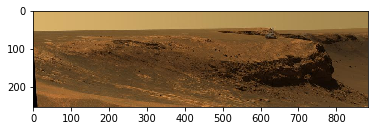

In [3]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
def dilationOrErosion(img,length,width,makeDilation):
    
    leftDist=int(width/2)
    upDist=int(length/2)
    newImg=img.copy()
    
    for i in range(leftDist,img.shape[0]-leftDist):
        for j in range(upDist,img.shape[1]-upDist): 
                   
                    if(makeDilation):
                        maxVal=getMaxOrMin(i-leftDist,i+leftDist+1,j-upDist,j+upDist+1,length,width,img,True)
                        newImg[i,j] = maxVal
                    else:
                        minVal=getMaxOrMin(i-leftDist,i+leftDist+1,j-upDist,j+upDist+1,length,width,img,False)
                        newImg[i,j] = minVal
                        
    return newImg
                   

In [5]:
def getMaxOrMin(starti,endi,startj,endj,LStrElem,WStrElem,img,getMax):
    
    outputBlue=np.zeros(WStrElem*LStrElem)
    outputGreen=np.zeros(WStrElem*LStrElem)
    outputRed=np.zeros(WStrElem*LStrElem)
    
    index=0
    for k in range(starti,endi):
        for m in range(startj,endj):
            #BGR
            outputBlue[index]=img[k,m][0]
            outputGreen[index]=img[k,m][1]
            outputRed[index]=img[k,m][2]
            index+=1
    if(getMax):
        return [max(outputBlue),max(outputGreen),max(outputRed)]
    else:
        return [min(outputBlue),min(outputGreen),min(outputRed)]
            

In [6]:
newDialation=dilationOrErosion(img,3,3,True)


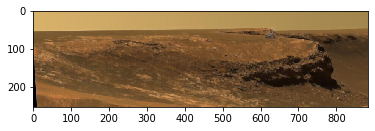

True

In [7]:
plt.imshow(cv2.cvtColor(newDialation, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite('dilated.jpg',newDialation) 

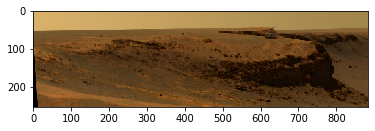

True

In [8]:
newErosion=dilationOrErosion(img,3,3,False)
plt.imshow(cv2.cvtColor(newErosion, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite('erosion.jpg',newErosion) 

In [9]:
def opening(img,length,width):
    erosion=dilationOrErosion(img,length,width,False)
    dilation=dilationOrErosion(erosion,length,width,True)
    return dilation
    

In [10]:
def closing(img,length,width):
    dilation=dilationOrErosion(img,length,width,True)
    erosion=dilationOrErosion(dilation,length,width,False)
    return erosion

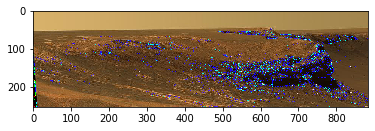

In [12]:
opened=opening(img,3,3)
closed=closing(img,3,3)
a=1
b=1
incContrast= img + (a*(img-opened)) - (b*(closed-img))

plt.imshow(cv2.cvtColor(incContrast, cv2.COLOR_BGR2RGB))
plt.show()